In [5]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.1


In [4]:
t1 = tf.Variable([1, 2, 3]) # 모델 파라미터
t2 = tf.constant([1, 2, 3]) # 데이터셋, 고정값들
print(t1)
print(t2)
print(type(t1))
print(type(t2))

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
tf.Tensor([1 2 3], shape=(3,), dtype=int32)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [7]:
# list, ndarray -> tf.Tensor(Variable, constant)

test_list = [1, 2, 3]
test_np = np.array([1, 2, 3])

t1 = tf.constant(test_list)
t2 = tf.Variable(test_np)

print(t1)
print(t2)
print(type(t1))
print(type(t2))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
<tf.Variable 'Variable:0' shape=(3,) dtype=int64, numpy=array([1, 2, 3])>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [13]:
print(t2)
t3 = tf.constant(t2)
t4 = tf.convert_to_tensor(t2) #모든 데이터타입을 Eager텐서로 만들어줌
print(t3)
print(type(t4))

<tf.Variable 'Variable:0' shape=(3,) dtype=int64, numpy=array([1, 2, 3])>
tf.Tensor([1 2 3], shape=(3,), dtype=int64)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [15]:
test_list1 = [10, 20, 30]
test_list2 = [1, 2, 3]

t1 = tf.Variable(test_list1) # ResourceTensor
t2 = tf.Variable(test_list2) # ResourceTensor

t3 = t1 + t2 # 더하기 연산의 결과는 EagerTensor
print(type(t3))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [19]:
import tensorflow as tf
import numpy as np

In [23]:
t2 = tf.ones(shape=(128, 128, 3))
print(t2.shape)

t3 = tf.zeros(shape=(128, 128, 3))
print(t3[0][0])

t4 = 3*tf.ones(shape=(128, 128, 3))
print(t4[0][0])

(128, 128, 3)
tf.Tensor([0. 0. 0.], shape=(3,), dtype=float32)
tf.Tensor([3. 3. 3.], shape=(3,), dtype=float32)


In [29]:
test_list = [[1,2,3], [4,5,6]]

t1 = tf.Variable(test_list)
print(t1)
t2 = tf.ones_like(t1)
print(t2)
t3 = tf.zeros_like(t1)
print(t3)
print(t3.dtype)

t4 = tf.ones_like(t1, dtype=tf.float32)
print(t4.dtype)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>
tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)
<dtype: 'int32'>
<dtype: 'float32'>


In [30]:
import tensorflow as tf
import numpy as np

In [32]:
t1 = tf.constant([1, 2, 3])
t2 = tf.constant([4, 5, 6])

print(t1+t2)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)


In [42]:
t1 = tf.random.normal(shape=(3, 4), mean = 0, stddev = 5)
t2= tf.random.normal(shape=(1, 4), mean = 0, stddev = 5)

t1 = tf.cast(t1, dtype = tf.int16)
t2 = tf.cast(t2, dtype = tf.int16)

t3 = t1 + t2 # 브로드캐스팅(shape이 안맞을때 다른 쪽에 맞춰줌, 차원은 같아야함ㅋ)
print(t1)
print(t2)
print(t3) 

tf.Tensor(
[[ 3  8  4  0]
 [-3  7 -2 -1]
 [-1  0 -2  5]], shape=(3, 4), dtype=int16)
tf.Tensor([[-5  3  0 11]], shape=(1, 4), dtype=int16)
tf.Tensor(
[[-2 11  4 11]
 [-8 10 -2 10]
 [-6  3 -2 16]], shape=(3, 4), dtype=int16)


In [54]:
t1 = tf.random.normal(shape = (128, 128, 3),mean=0, stddev = 5)
print(t1.shape)
t2 = tf.reduce_sum(t1, axis=2) # 없애고 싶은 axis의 number를 지정해주자(없애면서 합한다)
print(t2.shape)
print(t2)

(128, 128, 3)
(128, 128)
tf.Tensor(
[[  2.1501565    0.09748292   5.788456   ...  -0.6644664   16.849304
  -15.663441  ]
 [ -9.915156     5.2795563   -0.43370664 ...  15.677312     7.601713
   -0.46537971]
 [ -6.1360726    9.232886    12.361244   ...  -3.4027889   -3.132482
   -0.70240355]
 ...
 [  6.7654495  -12.283155     1.9177727  ...   0.6121098    0.6253259
    2.7748895 ]
 [ 11.936186     1.4796734    2.8039103  ...   4.9745836   -3.3181155
    8.483637  ]
 [ -0.88989264  -3.173533    -3.5825324  ...   2.6630225   -2.7619061
   20.001099  ]], shape=(128, 128), dtype=float32)


In [65]:
# tf.GradientTape()
# fowardPropagation을 하는 동안(Model, loss)의 연산을 Tape에 저장

t1 = tf.constant([1, 2, 3], dtype=tf.float32) # 역전파가 일어날 필요가 없음
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

with tf.GradientTape() as tape:
  t3 = t1 * t2
  t4 = t3 + t2

gradients = tape.gradient(t4, [t1, t2, t3])

print(type(gradients))
print(f'dt1: {gradients[0]}')
print(f'dt2: {gradients[1]}')
print(f'dt3: {gradients[2]}')

<class 'list'>
dt1: None
dt2: [2. 3. 4.]
dt3: [1. 1. 1.]


<dtype: 'float64'> <dtype: 'float64'>


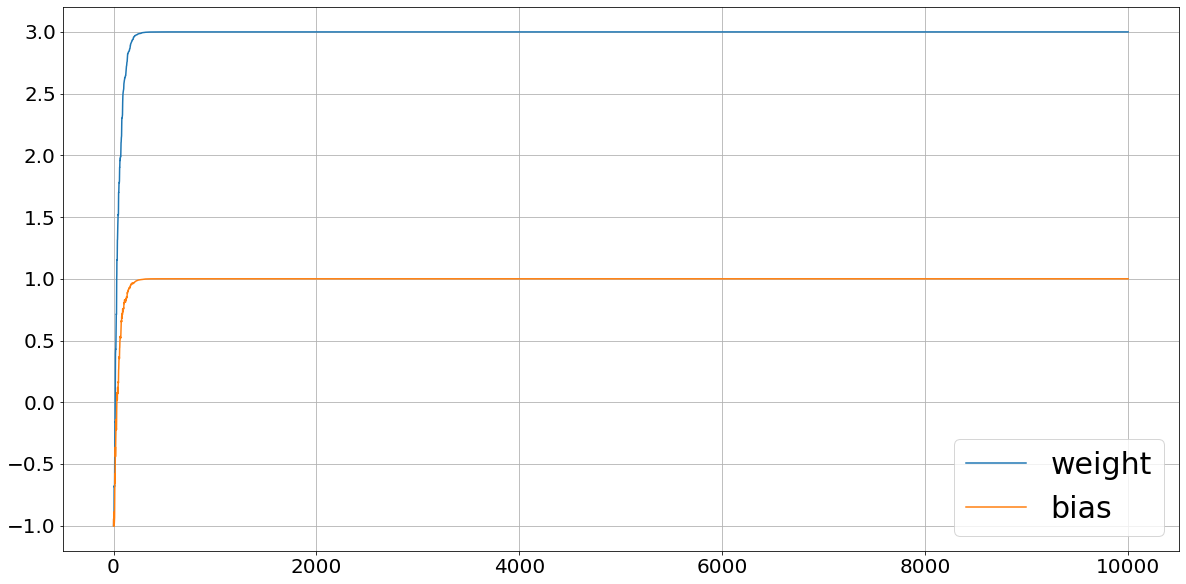

In [74]:
import matplotlib.pyplot as plt

x_data = tf.random.normal(shape = (1000, ), dtype=tf.float64)
y_data = 3*x_data + 1

print(x_data.dtype, y_data.dtype)
w = tf.Variable(-1, dtype=tf.float64)
b = tf.Variable(-1, dtype=tf.float64)

learning_rate = 0.01
epochs = 10

w_trace, b_trace = [], []
for epoch in range(epochs):
  for x, y in zip(x_data, y_data):
    with tf.GradientTape() as tape:
      prediction = w*x + b
      loss = (prediction - y)**2

    gradients = tape.gradient(loss, [w, b])

    w_trace.append(w.numpy())
    b_trace.append(b.numpy())
    w = tf.Variable(w - learning_rate*gradients[0])
    b = tf.Variable(b - learning_rate*gradients[1])

fig, ax = plt.subplots(figsize =(20, 10))
ax.plot(w_trace, label = 'weight')
ax.plot(b_trace, label = 'bias')

ax.tick_params(labelsize = 20)
ax.legend(fontsize = 30)
ax.grid()